<a href="https://colab.research.google.com/github/charlesyoo/2023-Predictive-Analytics/blob/main/Copy_of_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

sns.set()

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[4].shape

(28, 28)

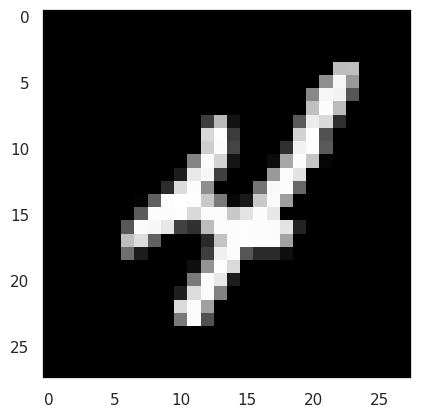

In [5]:
plt.imshow(x_train[9], cmap=plt.cm.gray, interpolation='nearest')
plt.grid(None)

In [6]:
print(y_train[4])

9


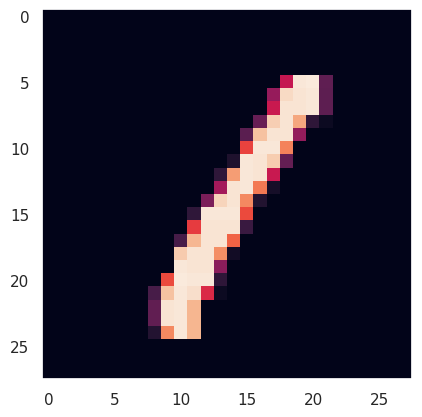

In [7]:
plt.imshow(x_train[3])
plt.grid(None)

In [8]:
np.set_printoptions(edgeitems=30, linewidth=100000)
print(x_train[3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  68 236 251 21

In [9]:
x_train, x_test = x_train/255.0, x_test/255.0

In [10]:
# Creating the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


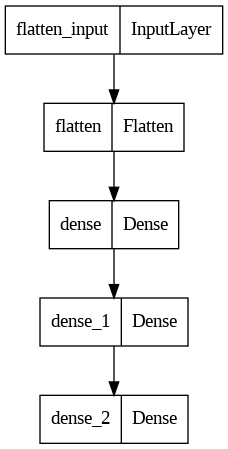

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
class accuracy99Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999):
            print("\n\nWe reached 99.9% accuracy!\n")
            self.model.stop_training = True

In [15]:
model.fit(x_train, y_train, epochs = 40, validation_data=(x_test, y_test), callbacks=[accuracy99Callback()])

Epoch 1/40
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3414 - accuracy: 0.9010 - val_loss: 0.1801 - val_accuracy: 0.9460
Epoch 2/40
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1699 - accuracy: 0.9500 - val_loss: 0.1606 - val_accuracy: 0.9495
Epoch 3/40
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1327 - accuracy: 0.9600 - val_loss: 0.1366 - val_accuracy: 0.9596
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1104 - accuracy: 0.9665 - val_loss: 0.1229 - val_accuracy: 0.9615
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0952 - accuracy: 0.9710 - val_loss: 0.1221 - val_accuracy: 0.9635
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9736 - val_loss: 0.1125 - val_accuracy: 0.9653
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0790 - accuracy: 0.9758 - val_loss: 0.1152 - val_accura

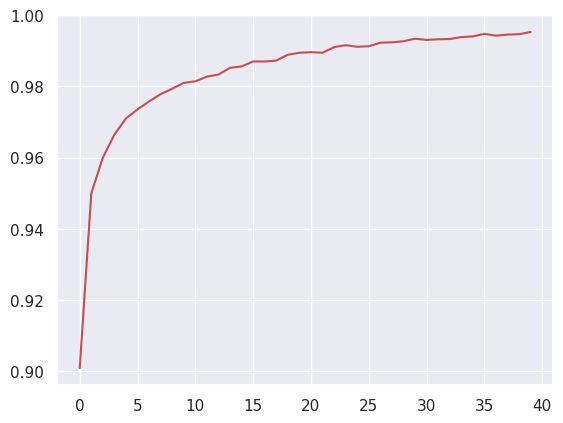

In [16]:
plt.plot(model.history.history['accuracy'], 'r-')

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1971 - accuracy: 0.9672


[0.1971219927072525, 0.967199981212616]

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
%%time
# ~30 seconds

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.25, epochs=5, batch_size=16, verbose=1)

Epoch 1/5
2813/2813 [==============================] - 17s 6ms/step - loss: 0.2308 - accuracy: 0.9328 - val_loss: 0.1358 - val_accuracy: 0.9607
Epoch 2/5
2813/2813 [==============================] - 17s 6ms/step - loss: 0.0962 - accuracy: 0.9708 - val_loss: 0.1152 - val_accuracy: 0.9642
Epoch 3/5
2813/2813 [==============================] - 14s 5ms/step - loss: 0.0624 - accuracy: 0.9806 - val_loss: 0.0904 - val_accuracy: 0.9738
Epoch 4/5
2813/2813 [==============================] - 15s 5ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.1011 - val_accuracy: 0.9708
Epoch 5/5
2813/2813 [==============================] - 15s 5ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.0965 - val_accuracy: 0.9731
CPU times: user 1min 24s, sys: 5.21 s, total: 1min 29s
Wall time: 1min 18s


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


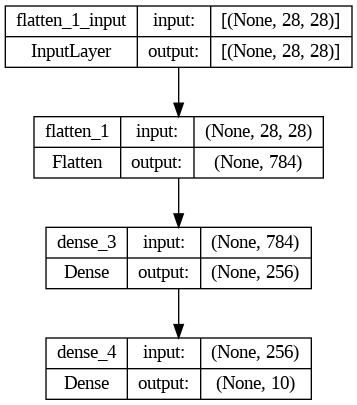

In [21]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

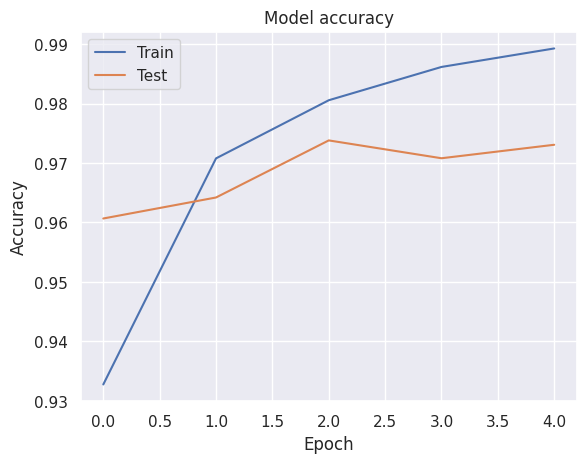

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
inp = x_test[4].reshape((1, 28, 28))
res = model.predict(inp)

1/1 [==============================] - 0s 78ms/step


In [24]:
y_test[4]

4

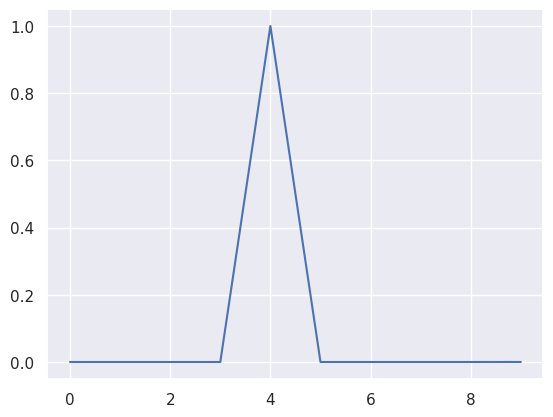

In [25]:
plt.plot(range(10), res[0])

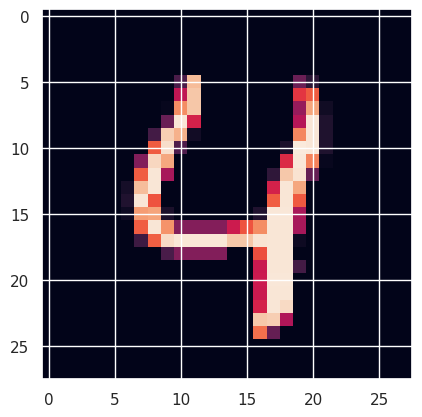

In [26]:
plt.imshow(x_test[4])

In [27]:
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
